## **Predict PM2.5 Concentration of Hanoi using Random forest**

Particle pollution from fine particulates (PM2.5) is a concern when levels in air are unhealthy. Breathing in unhealthy levels of PM2.5 can increase the risk of health problems like heart disease, asthma, and low birth weight.

In this project, i will be analysing and predicting the pm2.5 concentration of Hanoi.

For this project, dataset is taken from IQAir historical data, from 2020-02-25 to 2021-12-31.

The table below shows the thresholds of pm2.5.

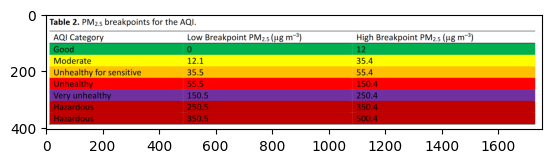

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
  
image = mpimg.imread("PM25_Thresholds.png")
plt.imshow(image)
plt.show()

# Exploratory data analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df1 = pd.read_excel("BVMT_1.xlsx")
df2 = pd.read_excel("BVMT_2.xlsx")
df3 = pd.read_excel("BVMT_3.xlsx")

df = pd.concat([df1, df2, df3])

In [6]:
df.head(5)

,Datetime,NHIệT độ,NOX,SO2,O3,PM-10,PM-2-5,NO,NO2,CO,ÁP SUấT KHí QUYểN,RADIATION,RH,HướNG GIó,TốC độ GIó,LượNG MưA
0,21:00 25/02/2020,22.2,48.80,6.43,7.08,76.14,50.19,10.25,33.14,998.1,1013.4,7.4,69.1,150,2.4,0
1,22:00 25/02/2020,21.5,63.05,6.25,4.16,75.28,47.97,16.26,38.20,791.8,1013.6,6.9,72.7,151,1.7,0
2,23:00 25/02/2020,21.3,62.61,5.55,3.36,72.97,51.11,16.93,36.75,894,1013.5,6.4,71.6,148,1.9,0
3,00:00 26/02/2020,21.2,61.86,6.68,4.76,77.43,53.45,16.80,36.18,1117.9,1013.4,6.7,70.4,149,2,0
4,01:00 26/02/2020,21,84.88,5.39,1.54,69.16,52.04,27.21,43.30,652.8,1013.2,6.6,73.3,149,1.8,0


In [7]:
df.tail(5)

,Datetime,NHIệT độ,NOX,SO2,O3,PM-10,PM-2-5,NO,NO2,CO,ÁP SUấT KHí QUYểN,RADIATION,RH,HướNG GIó,TốC độ GIó,LượNG MưA
1392,19:00 31/12/2021,15.8,41.36,0,0.0,61.02,0.0,6.48,31.46,1802.5,1020.4,7.3,67.9,43,0.8,0.0
1393,20:00 31/12/2021,15.8,40.06,0,0.0,70.99,0.0,6.40,30.29,1921.7,1021.0,7.1,67.8,37,0.3,0.0
1394,21:00 31/12/2021,15.9,42.13,0,0.0,75.75,0.0,6.53,32.15,1848.7,1021.4,7.2,66.8,53,0.7,0.0
1395,22:00 31/12/2021,15.9,40.02,0,0.0,72.14,0.0,6.46,30.17,1724.8,1021.6,7.4,66.7,66,0.9,0.0
1396,23:00 31/12/2021,15.6,40.18,0,0.0,71.02,0.0,6.43,30.36,1591.4,1021.4,7.1,67.8,11,0.6,0.0


In [8]:
df.shape

(15072, 16)

In [9]:
# Rename columns for easier processing
df.columns = [
    "Datetime", "Temperature", "NOX", "SO2", "O3", "PM10", "PM2.5", "NO", "NO2", "CO",
    "Pressure", "Radiation", "RH", "Wind_Direction", "Wind_Speed", "Rainfall"
]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15072 entries, 0 to 1396
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        15072 non-null  object 
 1   Temperature     15072 non-null  object 
 2   NOX             15072 non-null  float64
 3   SO2             15072 non-null  object 
 4   O3              15072 non-null  float64
 5   PM10            15072 non-null  object 
 6   PM2.5           15072 non-null  object 
 7   NO              15072 non-null  float64
 8   NO2             15072 non-null  float64
 9   CO              15072 non-null  object 
 10  Pressure        15072 non-null  object 
 11  Radiation       15072 non-null  object 
 12  RH              15072 non-null  object 
 13  Wind_Direction  15072 non-null  object 
 14  Wind_Speed      15072 non-null  object 
 15  Rainfall        15072 non-null  object 
dtypes: float64(4), object(12)
memory usage: 2.0+ MB


In [ ]:
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%H:%M %d/%m/%Y", errors='coerce')

numeric_cols = ["Temperature", "SO2", "PM10", "PM2.5", "CO", "Pressure", "Radiation", "RH", "Wind_Direction", "Wind_Speed", "Rainfall"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15072 entries, 0 to 1396
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        15072 non-null  datetime64[ns]
 1   Temperature     15067 non-null  float64       
 2   NOX             15072 non-null  float64       
 3   SO2             15070 non-null  float64       
 4   O3              15072 non-null  float64       
 5   PM10            15065 non-null  float64       
 6   PM2.5           15059 non-null  float64       
 7   NO              15072 non-null  float64       
 8   NO2             15072 non-null  float64       
 9   CO              15070 non-null  float64       
 10  Pressure        13730 non-null  float64       
 11  Radiation       13730 non-null  float64       
 12  RH              13730 non-null  float64       
 13  Wind_Direction  13730 non-null  float64       
 14  Wind_Speed      13730 non-null  float64       
 15  Rainfall

In [13]:
print(df.Datetime.min(), df.Datetime.max())

2020-02-25 21:00:00 2021-12-31 23:00:00


In [15]:
df.isnull().sum()

Datetime             0
Temperature          5
NOX                  0
SO2                  2
O3                   0
PM10                 7
PM2.5               13
NO                   0
NO2                  0
CO                   2
Pressure          1342
Radiation         1342
RH                1342
Wind_Direction    1342
Wind_Speed        1342
Rainfall          1342
dtype: int64

In [16]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [17]:
df.describe()

,Datetime,Temperature,NOX,SO2,O3,PM10,PM2.5,NO,NO2,CO,Pressure,Radiation,RH,Wind_Direction,Wind_Speed,Rainfall
count,15072,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000
mean,2021-01-30 14:11:00.847929856,22.635599,31.043598,1.446805,7.603134,58.166561,34.787953,6.081716,21.702573,835.918043,964.312351,129.717091,61.925527,143.219314,1.362898,0.109873
min,2020-02-25 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.270000,-2.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-08-19 09:45:00,19.400000,13.390000,0.000000,0.000000,30.137500,17.467500,0.960000,9.977500,424.875000,1002.600000,7.000000,54.700000,61.000000,0.900000,0.000000
50%,2021-01-26 15:30:00,24.200000,27.090000,1.490000,2.100000,49.370000,30.180000,4.290000,18.600000,716.550000,1007.500000,8.950000,65.700000,143.000000,1.300000,0.000000
75%,2021-07-20 08:15:00,28.700000,41.650000,2.540000,11.172500,75.272500,46.390000,6.690000,30.422500,1105.975000,1013.200000,158.625000,74.400000,169.000000,1.800000,0.000000
max,2021-12-31 23:00:00,40.600000,683.780000,32.300000,231.190000,393.560000,529.550000,378.600000,246.250000,9946.100000,1028.600000,1030.700000,93.700000,360.000000,5.600000,42.720000
std,NaN,9.189182,26.695681,1.321354,12.112279,45.737572,28.531805,9.912251,17.330934,670.791613,205.770475,217.137906,18.098835,96.020707,0.702595,1.096453


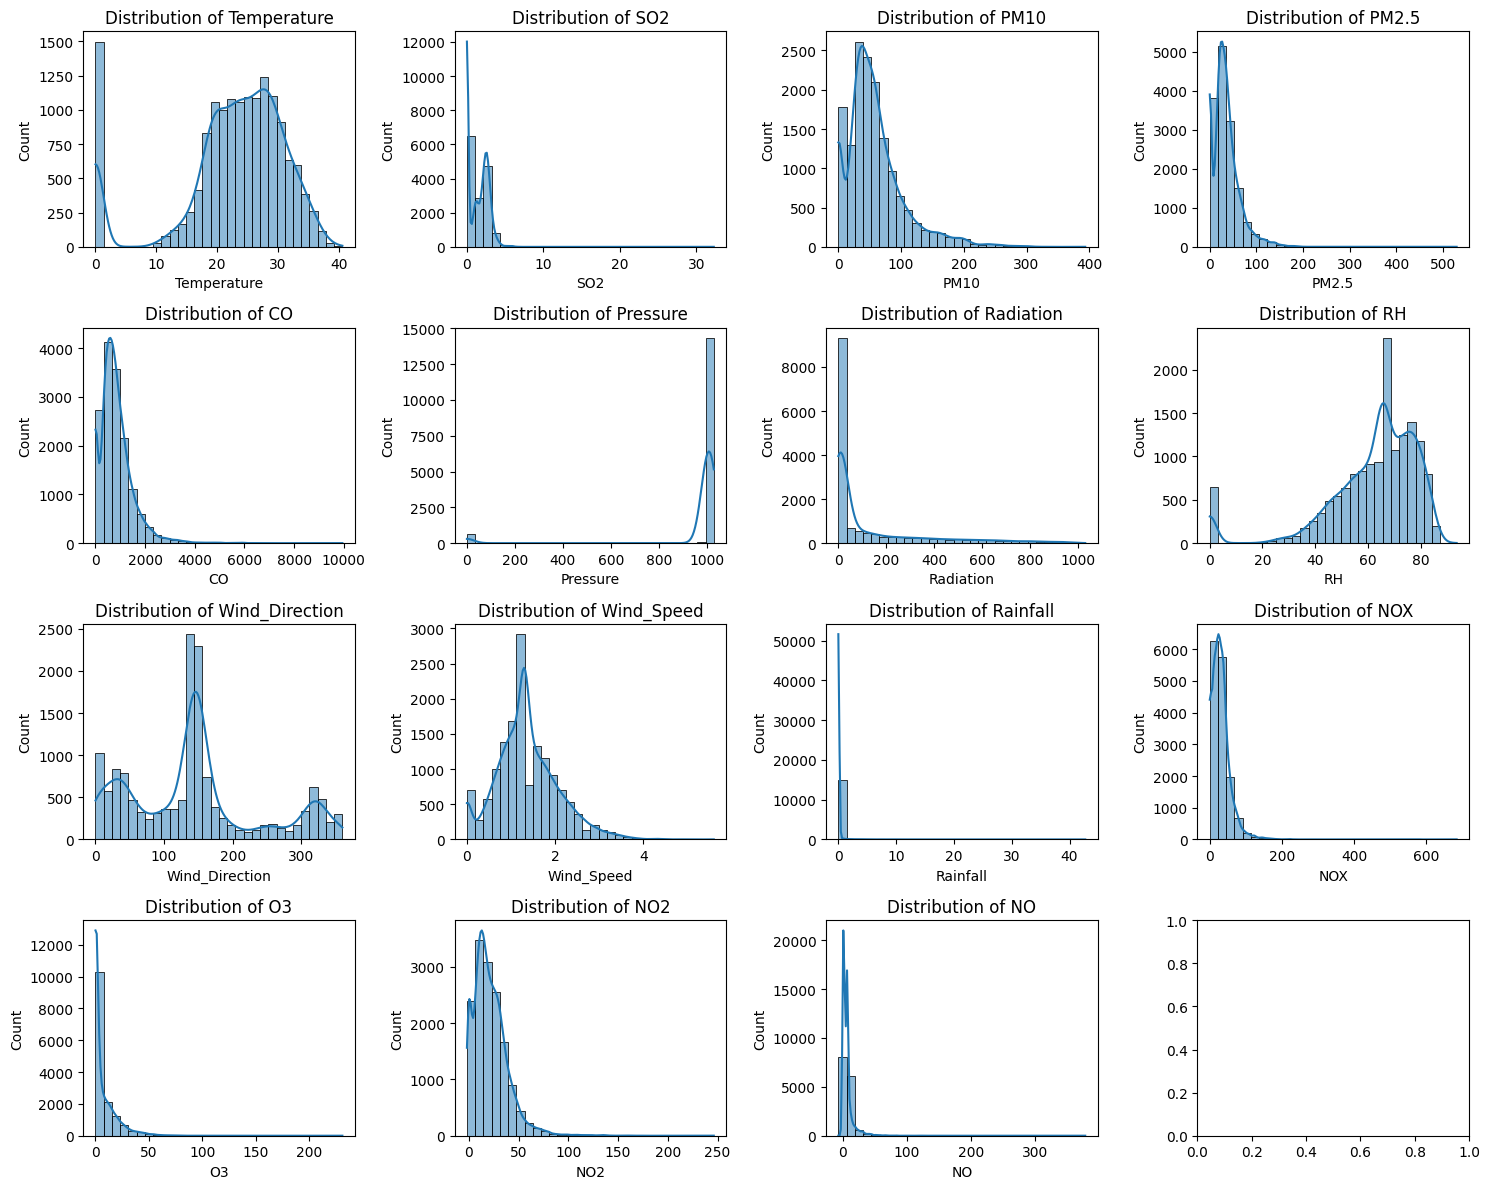

In [22]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
columns_to_plot = ["Temperature", "SO2", "PM10", "PM2.5", "CO", "Pressure", "Radiation", "RH", "Wind_Direction", "Wind_Speed", "Rainfall", "NOX", "O3", "NO2", "NO"]

for ax, col in zip(axes.flat, columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Although there are some extreme values in most features, it is reasonable since the dataset contains certain 0 values and null values.

PM2.5 and PM10 show right-skewed distributions.

CO has a wide range, suggesting possible anomalies.

Other features, such as Temperature and NOX, show normal or slightly skewed distributions.

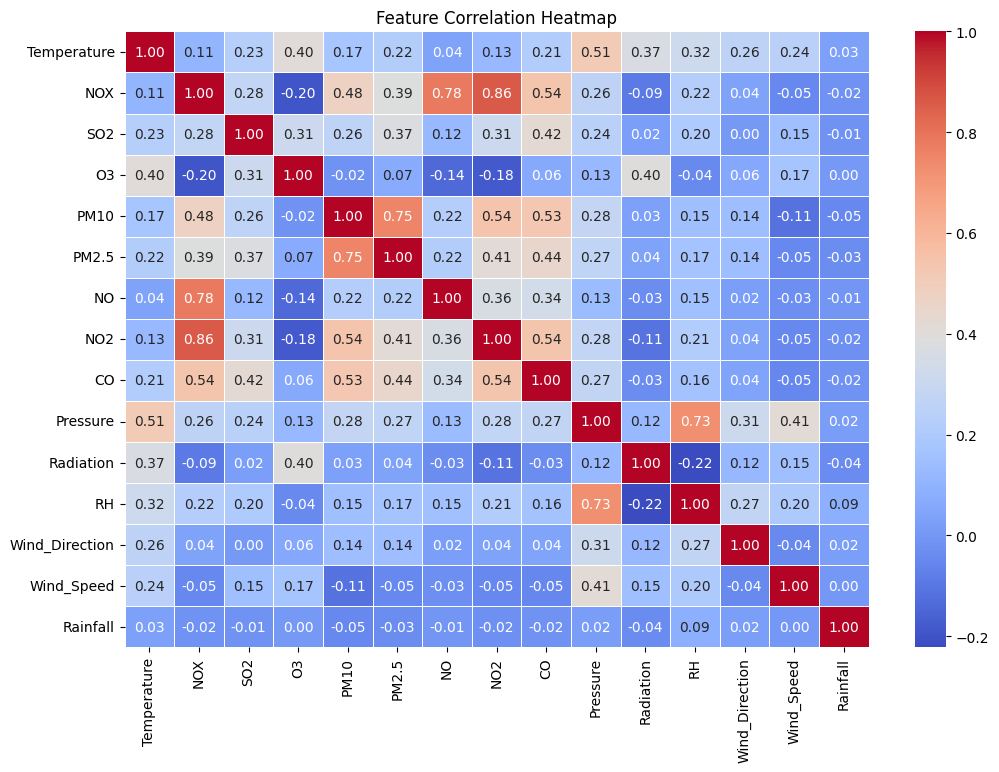

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

PM2.5 is positively correlated with PM10, NOX, NO2, and CO, indicating shared pollution sources.

Temperature has a negative correlation with RH (relative humidity), which is expected.

Wind Speed and Rainfall have weak relationships with PM2.5, meaning wind might not be a major dispersal factor in this dataset.

# Random forest model

In [23]:
X = df.drop(columns=["Datetime", "PM2.5"])  
y = df["PM2.5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 5.625399800995025
RMSE: 9.140825560273168
R² Score: 0.8967044075263041


MAE (5.63): On average, the predictions are off by about 5.63 units of PM2.5.

RMSE (9.14): This gives more weight to larger errors.

R² Score (0.897): The model captures most of the variance in the data.

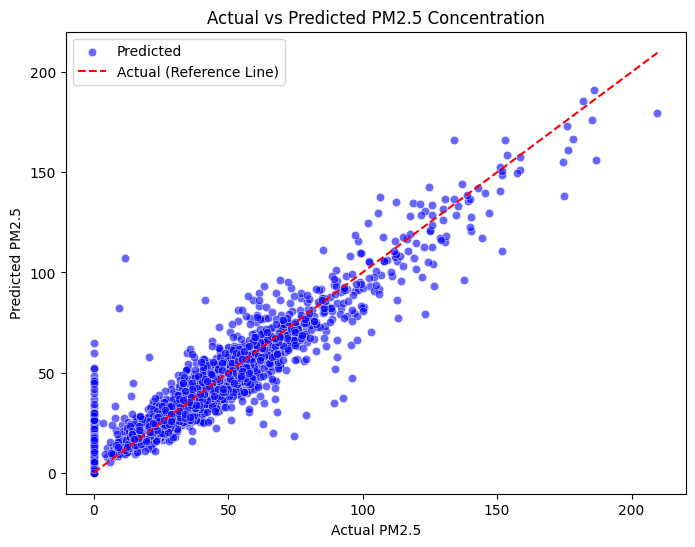

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Predicted", color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Actual (Reference Line)")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5 Concentration")
plt.legend()

plt.show()

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)

best_rf_model = rf_random.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

y_pred = best_rf_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 5.780317312562945
RMSE: 9.269159636162808
R² Score: 0.8937835768869816


After hyperparameter tuning, R² score only dropped slightly (from 0.897 to 0.894), MAE and RMSE performed slightly worse, meaning the difference is not drastic and could be due to randomness in the tuning process. In summary, the original model worked best in this case.